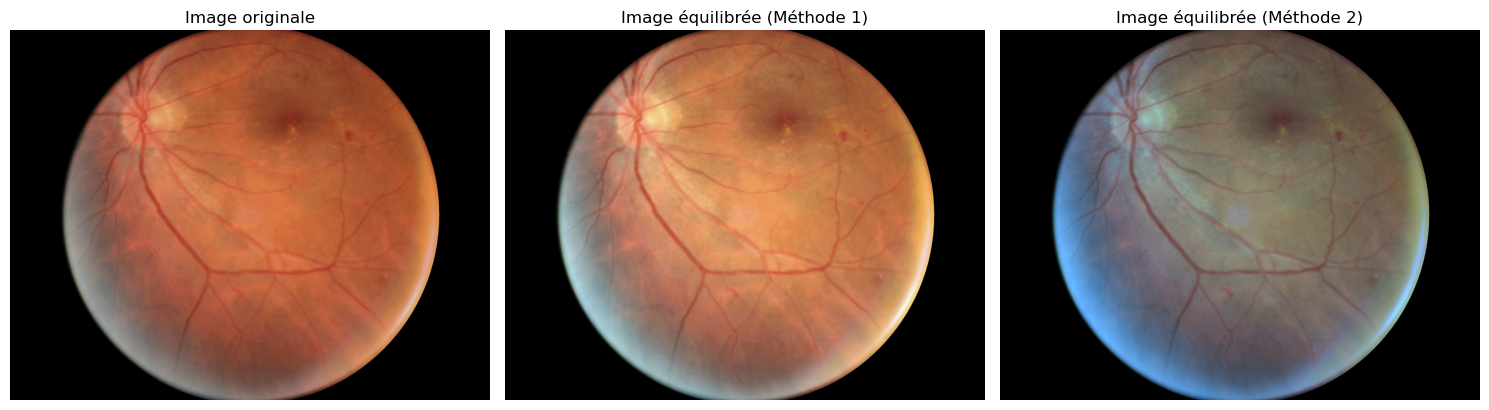

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import img_as_ubyte
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import mean_squared_error as mse


# Lecture de l'image
image = cv2.imread('../data/image_4.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Méthode 1 : Normalisation par la valeur maximale
white_balanced1 = (image * 1.0 / image.max(axis=(0,1)))

# Méthode 2 : Normalisation par la moyenne
white_balanced2 = ((image * (image.mean() / image.mean(axis=(0, 1)))).clip(0, 255).astype(int))

white_balanced1_uint8 = img_as_ubyte(white_balanced1)
white_balanced2_uint8 = np.clip(white_balanced2, 0, 255).astype(np.uint8)

def calculate_image_entropy(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    histogram, _ = np.histogram(gray_image, bins=256, range=(0, 255), density=True)
    histogram = histogram + np.finfo(float).eps 
    return -np.sum(histogram * np.log2(histogram))

def calculate_ambe(original, generated):
    return np.mean(np.abs(np.mean(original) - np.mean(generated)))

def calculate_coc(original, generated):
    original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    generated_gray = cv2.cvtColor(generated, cv2.COLOR_BGR2GRAY)
    return np.corrcoef(original_gray.flatten(), generated_gray.flatten())[0, 1]

def calculate_snr(image, noise):
    mean_signal = np.mean(image)
    mean_noise = np.mean(noise)
    return 10 * np.log10(mean_signal**2 / mean_noise**2)

# Calcul des métriques
psnr_wb1 = psnr(image, white_balanced1_uint8)
psnr_wb2 = psnr(image, white_balanced2_uint8)

mse_wb1 = mse(image, white_balanced1_uint8)
mse_wb2 = mse(image, white_balanced2_uint8)

entropy_orig = calculate_image_entropy(image)
entropy_wb1 = calculate_image_entropy(white_balanced1_uint8)
entropy_wb2 = calculate_image_entropy(white_balanced2_uint8)

ssim_wb1, _ = ssim(image, white_balanced1_uint8, full=True, channel_axis=-1)
ssim_wb2, _ = ssim(image, white_balanced2_uint8, full=True, channel_axis=-1)

ambe_wb1 = calculate_ambe(image, white_balanced1_uint8)
ambe_wb2 = calculate_ambe(image, white_balanced2_uint8)

coc_wb1 = calculate_coc(image, white_balanced1_uint8)
coc_wb2 = calculate_coc(image, white_balanced2_uint8)

noise_wb1 = white_balanced1_uint8 - image
noise_wb2 = white_balanced2_uint8 - image

snr_wb1 = calculate_snr(image, noise_wb1)
snr_wb2 = calculate_snr(image, noise_wb2)

# Affichage des résultats
print(f'PSNR Méthode 1: {psnr_wb1:.2f}')
print(f'PSNR Méthode 2: {psnr_wb2:.2f}')
print(f'MSE Méthode 1: {mse_wb1:.2f}')
print(f'MSE Méthode 2: {mse_wb2:.2f}')
print(f'Entropie Image Originale: {entropy_orig:.2f}')
print(f'Entropie Méthode 1: {entropy_wb1:.2f}')
print(f'Entropie Méthode 2: {entropy_wb2:.2f}')
print(f'SSIM Méthode 1: {ssim_wb1:.3f}')
print(f'SSIM Méthode 2: {ssim_wb2:.3f}')
print(f'AMBE Méthode 1: {ambe_wb1:.2f}')
print(f'AMBE Méthode 2: {ambe_wb2:.2f}')
print(f'CoC Méthode 1: {coc_wb1:.3f}')
print(f'CoC Méthode 2: {coc_wb2:.3f}')
print(f'SNR Méthode 1: {snr_wb1:.2f}')
print(f'SNR Méthode 2: {snr_wb2:.2f}')


# Affichage des images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Image originale')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(white_balanced1_uint8[:, :, ::-1])
plt.title('Image équilibrée (Méthode 1)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(white_balanced2_uint8[:, :, ::-1])
plt.title('Image équilibrée (Méthode 2)')
plt.axis('off')

plt.tight_layout()
plt.show()
